In [107]:
import tensorflow as tf
from edward.models import Normal

In [108]:
import numpy as np

x_train = np.linspace(-3, 3, num=50)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, size=50)
x_train = x_train.astype(np.float32).reshape((50, 1))
y_train = y_train.astype(np.float32).reshape((50, 1))

In [109]:
W_0 = Normal(mu=tf.zeros([1, 2]), sigma=tf.ones([1, 2]))
W_1 = Normal(mu=tf.zeros([2, 1]), sigma=tf.ones([2, 1]))
b_0 = Normal(mu=tf.zeros(2), sigma=tf.ones(2))
b_1 = Normal(mu=tf.zeros(1), sigma=tf.ones(1))

x = x_train
y = Normal(mu=tf.matmul(tf.tanh(tf.matmul(x, W_0) + b_0), W_1) + b_1, sigma=0.1)

In [110]:
y_value = y.value().eval()

In [111]:
qW_0 = Normal(mu=tf.Variable(tf.zeros([1, 2])),
             sigma=tf.nn.softplus(tf.Variable(tf.zeros([1, 2]))))
qW_1 = Normal(mu=tf.Variable(tf.zeros([2, 1])),
             sigma=tf.nn.softplus(tf.Variable(tf.zeros([2, 1]))))
qb_0 = Normal(mu=tf.Variable(tf.zeros(2)),
             sigma=tf.nn.softplus(tf.Variable(tf.zeros(2))))
qb_1 = Normal(mu=tf.Variable(tf.zeros(1)),
             sigma=tf.nn.softplus(tf.Variable(tf.zeros(1))))

In [112]:
import edward as ed

inference = ed.KLqp({W_0:qW_0, b_0:qb_0, W_1:qW_1, b_1:qb_1}, data={y: y_train})

inference.run(n_iter=1000)

Iteration    1 [  0%]: Loss = 1654.203
Iteration  100 [ 10%]: Loss = 844.356
Iteration  200 [ 20%]: Loss = 44.019
Iteration  300 [ 30%]: Loss = 22.194
Iteration  400 [ 40%]: Loss = 24.097
Iteration  500 [ 50%]: Loss = -6.028
Iteration  600 [ 60%]: Loss = -12.240
Iteration  700 [ 70%]: Loss = -2.326
Iteration  800 [ 80%]: Loss = -13.470
Iteration  900 [ 90%]: Loss = -8.669
Iteration 1000 [100%]: Loss = -12.328


/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


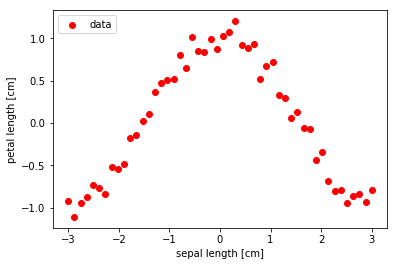

In [113]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x_train, y_train, color="red", marker="o", 
            label="data")

plt.xlabel("sepal length [cm]")

plt.ylabel("petal length [cm]")

plt.legend(loc="upper left")

plt.show()


# Data

In [114]:
x_data = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])
x_data = tf.constant([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])
x_datra = tf.placeholder(tf.float32, [100, 25])


# Models

In [115]:
from edward.models import Normal, Exponential

Normal(mu=tf.constant(0.0), sigma=tf.constant(1.0))
Normal(mu=tf.zeros(5), sigma=tf.ones(5))
Exponential(lam=tf.ones([2, 3]))

<ed.RandomVariable 'Exponential_1/' shape=(2, 3) dtype=tf.float32>

In [116]:
from edward.models import Normal

x = Normal(mu=tf.zeros(10), sigma=tf.ones(10))
y = tf.constant(5.0)
x + y, x - y, x * y, x / y
tf.tanh(x * y)
tf.gather(x, 2)

<tf.Tensor 'Gather_1:0' shape=() dtype=float32>

# Composing Random Variables

In [117]:
from edward.models import Bernoulli, Beta

theta = Beta(a=1.0, b=1.0)
x = Bernoulli(p=tf.ones(50) + theta)

In [118]:
theta = tf.Variable(0.0)
x = Bernoulli(p=tf.ones(50) + tf.sigmoid(theta))

# Neural Networks

In [123]:
from tensorflow.contrib import slim

N = 50
d = 1
z = Normal(mu=tf.zeros([N, d]), sigma=tf.ones([N, d]))
h = slim.fully_connected(z, 256)
x = Bernoulli(logits=slim.fully_connected(h, 28 * 28, activation_fn=None))

## Keras

In [125]:
from keras.layers import Dense

h = Dense(256, activation='relu')(z.value())
x = Bernoulli(logits=Dense(28 * 28)(h))